In [1]:
# general tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# feature engineering
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# feature selection
from pymrmre import mrmr
from sklearn.feature_selection import SelectFromModel

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

### EDA

In [2]:
df = pd.read_csv('data/pd_speech_features.csv')
print(f'Shape of DataFrame: {df.shape}')

Shape of DataFrame: (756, 755)


In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [5]:
# check null values
if df.isnull().sum().any():
    print(f'Dataset total contains {df.isnull().sum().sum()} null values.')
else:
    print('Dataset does not contain any null values.')

Dataset does not contain any null values.


In [6]:
# class counts
df[['class']].value_counts() # each obervation was repeated 3 times

class
1        564
0        192
dtype: int64

In [7]:
print('Average value differences between sick and healthy person:')
df.groupby('class').mean()

Average value differences between sick and healthy person:


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
class,,,,,,,,,,,,,,,,,,,,,
0,139.421875,0.359375,0.767434,0.663866,0.430807,372.244792,371.031250,0.005699,0.000290,0.001405,...,47.053772,45.754404,32.006881,21.592319,14.797452,10.726868,9.021939,9.619535,9.326543,15.074830
1,120.760638,0.569149,0.739084,0.712856,0.508888,307.539007,306.218085,0.006585,0.000414,0.002637,...,12.165554,19.593113,19.719812,17.565102,13.556976,12.726897,13.516916,16.562531,16.598373,37.066227


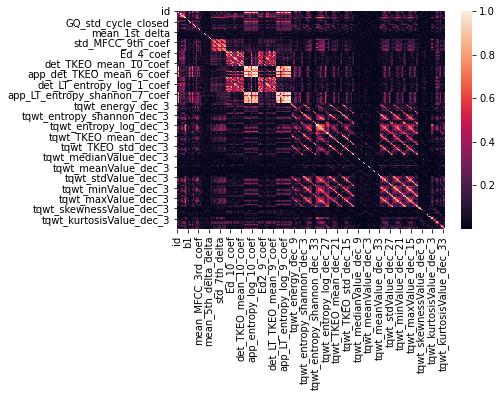

In [8]:
# check feature correlations
corr = df.corr()

# plot correlation heatmap
sns.heatmap(np.abs(corr))
plt.show()

### Baseline Model

- Comparing with Logistics Regression and Random Forest

#### 1. Logistics Regression

In [9]:
# separate features and labels
X = df.drop(['id', 'class'], axis=1)
y = df['class']

# split raw data into training and testing sets
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size=0.2)

# training baseline Logistics Regression model
lg = LogisticRegression(max_iter=len(X_train_base))
lg.fit(X_train_base, y_train_base)

# predict target using trained baseline Logistics Regression model
y_pred_baseline = lg.predict(X_test_base)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Logistics Regression Model
Accuracy: 0.8157894736842105
Classification: 
              precision    recall  f1-score   support

           0       0.62      0.17      0.26        30
           1       0.83      0.98      0.89       122

    accuracy                           0.82       152
   macro avg       0.73      0.57      0.58       152
weighted avg       0.79      0.82      0.77       152



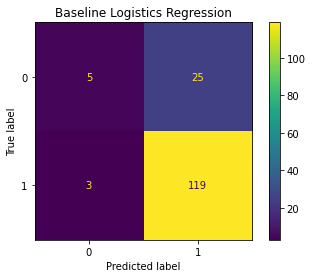

In [10]:
# print summary
print('Baseline Logistics Regression Model')
print(f'Accuracy: {accuracy_score(y_test_base, y_pred_baseline)}')
print(f'Classification: \n{classification_report(y_test_base, y_pred_baseline)}')

# calculate confusion matrix
cm = confusion_matrix(y_test_base, y_pred_baseline)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Baseline Logistics Regression')
plt.show()

#### 2. Random Forest

In [11]:
# initialize RandomForest Classifier
rfc = RandomForestClassifier(random_state=2000, n_jobs=-1)

# set up hyperparamters
rf_params = {'n_estimators': [500, 600], 
           'criterion': ['gini', 'entropy'],
           'max_depth': [10, 20, 30]}

# fit GridSearch on Random Forest Classifier
gs_rfc = GridSearchCV(estimator=rfc, param_grid=rf_params, n_jobs=-1, verbose=1)
gs_rfc_baseline = gs_rfc.fit(X_train_base, y_train_base)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [12]:
# check the best parameters and scores
print('Baseline Random Forest')
print(f'Best params: {gs_rfc_baseline.best_params_}')
print(f'Best score: {gs_rfc_baseline.best_score_}')

Baseline Random Forest
Best params: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 500}
Best score: 0.8642148760330578


In [13]:
# predict on test set
y_pred_gs_rfc_baseline = gs_rfc_baseline.predict(X_test_base)

Baseline Random Forest
Accuracy: 0.9013157894736842
Classification: 
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.93      0.94      0.94       122

    accuracy                           0.90       152
   macro avg       0.85      0.84      0.84       152
weighted avg       0.90      0.90      0.90       152



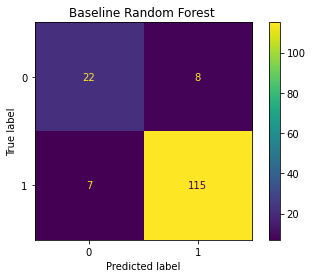

In [14]:
# print summary
print('Baseline Random Forest')
print(f'Accuracy: {accuracy_score(y_test_base, y_pred_gs_rfc_baseline)}')
print(f'Classification: \n{classification_report(y_test_base, y_pred_gs_rfc_baseline)}')

# calculate confusion matrix
cm = confusion_matrix(y_test_base, y_pred_gs_rfc_baseline)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Baseline Random Forest ')
plt.show()

### Feature Engineering

1. Drop Features

In [15]:
# drop id column
df = df.drop('id', axis=1)

# drop TQWT columns per paper suggested
cols_to_drop = [col for col in df.columns if col.lower()[:4] != 'tqwt']
df_no_tqwt = df[cols_to_drop]

print(f'New shape: {df_no_tqwt.shape}')

New shape: (756, 322)


2. Seperate Train/Test Group:

In [16]:
# split out the test group from the training group
X = df_no_tqwt.drop('class', axis=1)
y = df_no_tqwt['class']

# setup train/test group with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

3. SMOTE (Synthetic Minority Oversampling Technique)

In [17]:
# apply SMOTE only to training set
oversampling = SMOTE(sampling_strategy='minority', random_state=2000, n_jobs=-1)
X_train, y_train = oversampling.fit_resample(X_train, y_train)

### Modeling without Feature Selection

- Show baseline Logistics Regression
- Compare Random Forest and XGBoost

#### 1. Logistics Regression

In [18]:
# training Logistics Regression with engineered features
lg = LogisticRegression(max_iter=len(df))
lg.fit(X_train, y_train)

# predict target using trained baseline Logistics Regression model
y_pred = lg.predict(X_test)

Logistics Regression Model with Engineered Features
Accuracy: 0.631578947368421
Classification: 
              precision    recall  f1-score   support

           0       0.36      0.49      0.42        41
           1       0.78      0.68      0.73       111

    accuracy                           0.63       152
   macro avg       0.57      0.59      0.57       152
weighted avg       0.67      0.63      0.65       152



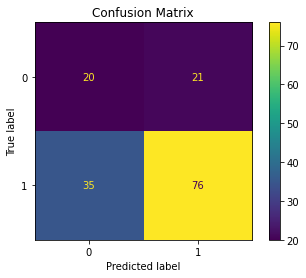

In [19]:
# print summary
print('Logistics Regression Model with Engineered Features')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification: \n{classification_report(y_test, y_pred)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

#### 2. Random Forest

In [20]:
# initialize RandomForest Classifier
rfc = RandomForestClassifier(random_state=2000, n_jobs=-1)

# set up hyperparamters
rf_params = {'n_estimators': [200, 300, 400], 
           'criterion': ['gini', 'entropy'],
           'max_depth': [10, 20, 30]}

# initialize GridSearch on Random Forest Classifier
gs_rfc = GridSearchCV(estimator=rfc, param_grid=rf_params, n_jobs=-1, verbose=1)

# fit the GridSearch to find the best parameters on training set
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=2000),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [200, 300, 400]},
             verbose=1)

In [22]:
# check the best parameters
print(f'Best params: {gs_rfc.best_params_}')

# check the best score
print(f'Best score: {gs_rfc.best_score_}')

Best params: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}
Best score: 0.9238722603363488


In [23]:
# predict on test set
y_pred_gs_rfc = gs_rfc.predict(X_test)

Random Forest with Engineered Features
Accuracy: 0.8289473684210527
Classification: 
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        41
           1       0.86      0.92      0.89       111

    accuracy                           0.83       152
   macro avg       0.79      0.75      0.77       152
weighted avg       0.82      0.83      0.82       152



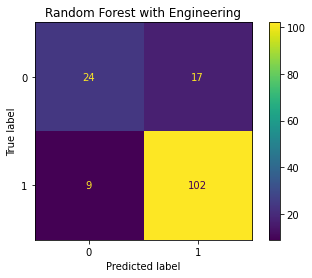

In [24]:
# print summary
print('Random Forest with Engineered Features')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gs_rfc)}')
print(f'Classification: \n{classification_report(y_test, y_pred_gs_rfc)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gs_rfc)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Random Forest with Engineering')
plt.show()

#### 3. XGBoost

In [25]:
# initialize RandomForest Classifier
xgbrfc = xgb.XGBRFClassifier(n_jobs=-1, use_label_encoder=False)

# set up hyperparamters
xgbrf_params = {'n_estimators': [300, 400, 500], 
                'max_depth': [5, 10, 15],
               'learning_rate': [0.025, 0.05, 0.1]}

# initialize GridSearch on Random Forest Classifier
gs_xgbrf = GridSearchCV(estimator=xgbrfc, param_grid=xgbrf_params, n_jobs=-1, verbose=1)

# fit the GridSearch to find the best parameters on training set
gs_xgbrf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[12:41:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=-1,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None,
                                       scale_pos_weight=None, tree_method=None,
                                       use_label_encoder=False,
              

In [26]:
# check the best parameters
print(f'Best params: {gs_xgbrf.best_params_}')

# check the best score
print(f'Best score: {gs_xgbrf.best_score_}')

Best params: {'learning_rate': 0.025, 'max_depth': 10, 'n_estimators': 400}
Best score: 0.905105943779977


In [27]:
# predict on test set
y_pred_gs_xgbrf = gs_xgbrf.predict(X_test)

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Random Forest with Engineered Features
Accuracy: 0.8618421052631579
Classification: 
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.89      0.92      0.91       111

    accuracy                           0.86       152
   macro avg       0.83      0.81      0.82       152
weighted avg       0.86      0.86      0.86       152



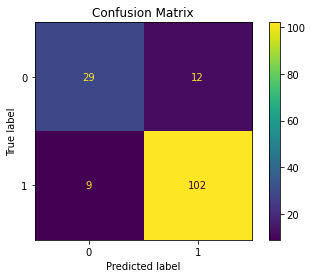

In [28]:
# print summary
print('Random Forest with Engineered Features')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gs_xgbrf)}')
print(f'Classification: \n{classification_report(y_test, y_pred_gs_xgbrf)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gs_xgbrf)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

### Feature Selection

- Compare mRMR technique and Random Forest Selection

#### A. Minimum Redundancy Maximum Relevance (mRMR)

In [29]:
# select top10 features
fs_mrmr = mrmr.mrmr_ensemble(features=X_train, targets=pd.DataFrame(y_train), solution_length=10, return_index=False)[0][0]
print(f'mRMR selected features:\n{fs_mrmr}')

mRMR selected features:
['mean_MFCC_2nd_coef', 'std_6th_delta_delta', 'std_delta_log_energy', 'gender', 'mean_2nd_delta', 'maxIntensity', 'locPctJitter', 'std_11th_delta_delta', 'DFA', 'GNE_SNR_SEO']


mRMR Selected Feature Correlation


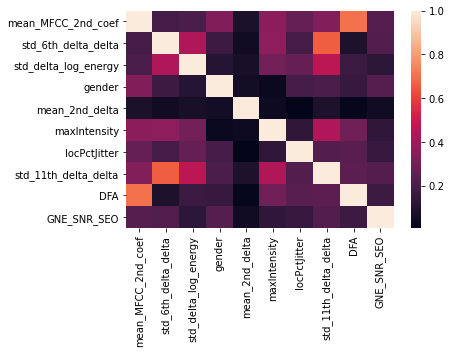

In [30]:
# check feature correlations
corr_mrmr = X_train[fs_mrmr].corr()

print('mRMR Selected Feature Correlation')
sns.heatmap(np.abs(corr_mrmr))
plt.show()

#### B. RandomForeset with GridSearch

In [34]:
# initialize RandomForest Classifier based on best params from previous GridSearch
fs_rfc = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=20, random_state=2000, n_jobs=-1)

# initialize SelectFromeModel with Random Forest
sfm = SelectFromModel(fs_rfc, max_features=10)

# fit to select the top 10 important features
sfm.fit(X_train, y_train)

# extract the selected feature names
features = sfm.get_support() # returns boolean for each feature
fs_sfm = [df.iloc[:, i].name for i, col in enumerate(features) if col]

print(f'Threshold for feature importance: {sfm.threshold_}')
print(f'Random Forest selected features:\n{fs_sfm}')

Threshold for feature importance: 0.003115264797507788
Random Forest selected features:
['DFA', 'minIntensity', 'mean_MFCC_2nd_coef', 'mean_MFCC_6th_coef', 'std_delta_log_energy', 'std_7th_delta', 'std_delta_delta_log_energy', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_9th_delta_delta']


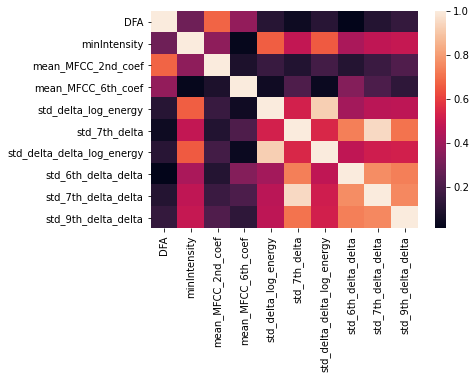

In [35]:
# check feature correlations
corr_sfm = df[fs_sfm].corr()

sns.heatmap(np.abs(corr_sfm))
plt.show()

In [36]:
# check if both techniques yield the same features
if sorted(fs_mrmr) == sorted(fs_sfm):
    print('Selected features are the same.')
else:
    print('Selected features are different')
    print(sorted(fs_mrmr))
    print(sorted(fs_sfm))

Selected features are different
['DFA', 'GNE_SNR_SEO', 'gender', 'locPctJitter', 'maxIntensity', 'mean_2nd_delta', 'mean_MFCC_2nd_coef', 'std_11th_delta_delta', 'std_6th_delta_delta', 'std_delta_log_energy']
['DFA', 'mean_MFCC_2nd_coef', 'mean_MFCC_6th_coef', 'minIntensity', 'std_6th_delta_delta', 'std_7th_delta', 'std_7th_delta_delta', 'std_9th_delta_delta', 'std_delta_delta_log_energy', 'std_delta_log_energy']


###  Modeling with Feature Selection

- Show SVM with feature selection
- Compare other models before and after feature selection
- All models are also compared between different feature selection techniques
- Class1 (sick) f1 score will be focused during evaluation since we would like to find out all the potential patients in the early stage of Parkinson's Disease

#### General Transformation

In [37]:
# transform training set with feature selections
X_train_mrmr = X_train[fs_mrmr]
X_test_mrmr = X_test[fs_mrmr]

X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

# initialize scaler candidates
mm = MinMaxScaler()
std = StandardScaler()

# scaling
mm_mrmr = mm.fit(X_train_mrmr)
X_train_mrmr_mm = mm_mrmr.transform(X_train_mrmr)
X_test_mrmr_mm = mm_mrmr.transform(X_test_mrmr)

mm_sfm = mm.fit(X_train_sfm)
X_train_sfm_mm = mm_sfm.transform(X_train_sfm)
X_test_sfm_mm = mm_sfm.transform(X_test_sfm)

std_mrmr = std.fit(X_train_mrmr)
X_train_mrmr_std = std_mrmr.transform(X_train_mrmr)
X_test_mrmr_std = std_mrmr.transform(X_test_mrmr)

std_sfm = std.fit(X_train_sfm)
X_train_sfm_std = std_sfm.transform(X_train_sfm)
X_test_sfm_std = std_sfm.transform(X_test_sfm)

#### 1. Support Vector Machine (SVM)

In [38]:
# initialize SVM
svc = SVC()

# set up hyperparamters
svc_params = {'C': [25, 50, 100, 150, 200, 250], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# fit GridSearch on Random Forest Classifier
gs_svc = GridSearchCV(estimator=svc, param_grid=svc_params, n_jobs=-1, verbose=1)
gs_svc_mrmr_mm = gs_svc.fit(X_train_mrmr_mm, y_train)

gs_svc = GridSearchCV(estimator=svc, param_grid=svc_params, n_jobs=-1, verbose=1)
gs_svc_mrmr_std = gs_svc.fit(X_train_mrmr_std, y_train)

gs_svc = GridSearchCV(estimator=svc, param_grid=svc_params, n_jobs=-1, verbose=1)
gs_svc_sfm_mm = gs_svc.fit(X_train_sfm_mm, y_train)

gs_svc = GridSearchCV(estimator=svc, param_grid=svc_params, n_jobs=-1, verbose=1)
gs_svc_sfm_std = gs_svc.fit(X_train_sfm_std, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [39]:
# check the best parameters and scores
print('mRMR with MinMax')
print(f'Best params: {gs_svc_mrmr_mm.best_params_}')
print(f'Best score: {gs_svc_mrmr_mm.best_score_}\n')

print('mRMR with Standard')
print(f'Best params: {gs_svc_mrmr_std.best_params_}')
print(f'Best score: {gs_svc_mrmr_std.best_score_}\n')

print('Random Forest with MinMax')
print(f'Best params: {gs_svc_sfm_mm.best_params_}')
print(f'Best score: {gs_svc_sfm_mm.best_score_}\n')

print('Random Forest with Standard')
print(f'Best params: {gs_svc_sfm_std.best_params_}')
print(f'Best score: {gs_svc_sfm_std.best_score_}')

mRMR with MinMax
Best params: {'C': 200, 'kernel': 'rbf'}
Best score: 0.8476898791815918

mRMR with Standard
Best params: {'C': 50, 'kernel': 'rbf'}
Best score: 0.8774998482180804

Random Forest with MinMax
Best params: {'C': 250, 'kernel': 'rbf'}
Best score: 0.8631777062716288

Random Forest with Standard
Best params: {'C': 50, 'kernel': 'rbf'}
Best score: 0.8863578410539736


In [40]:
# predict on test set
y_pred_mrmr_mm = gs_svc_mrmr_mm.predict(X_test_mrmr_mm)
y_pred_mrmr_std = gs_svc_mrmr_std.predict(X_test_mrmr_std)
y_pred_sfm_mm = gs_svc_sfm_mm.predict(X_test_sfm_mm)
y_pred_sfm_std = gs_svc_sfm_std.predict(X_test_sfm_std)

SVM with mRMR Feature Selection and MinMax Scaler
Accuracy: 0.7960526315789473
Classification: 
              precision    recall  f1-score   support

           0       0.59      0.80      0.68        41
           1       0.92      0.79      0.85       111

    accuracy                           0.80       152
   macro avg       0.75      0.80      0.77       152
weighted avg       0.83      0.80      0.80       152



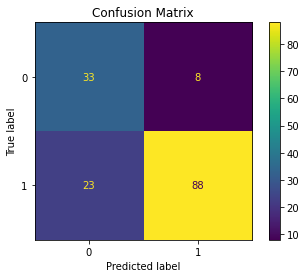

SVM with mRMR Feature Selection and Standard Scaler
Accuracy: 0.7828947368421053
Classification: 
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        41
           1       0.87      0.83      0.85       111

    accuracy                           0.78       152
   macro avg       0.73      0.74      0.73       152
weighted avg       0.79      0.78      0.79       152



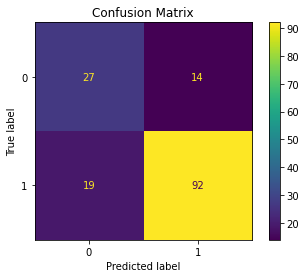

SVM with Random Forest Selection and MinMax Scaler
Accuracy: 0.8289473684210527
Classification: 
              precision    recall  f1-score   support

           0       0.64      0.83      0.72        41
           1       0.93      0.83      0.88       111

    accuracy                           0.83       152
   macro avg       0.79      0.83      0.80       152
weighted avg       0.85      0.83      0.83       152



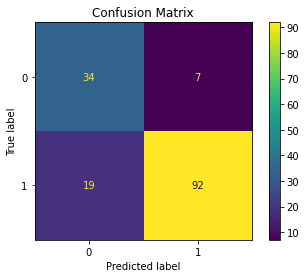

SVM with Random Forest Selection and Standard Scaler
Accuracy: 0.8355263157894737
Classification: 
              precision    recall  f1-score   support

           0       0.66      0.80      0.73        41
           1       0.92      0.85      0.88       111

    accuracy                           0.84       152
   macro avg       0.79      0.83      0.80       152
weighted avg       0.85      0.84      0.84       152



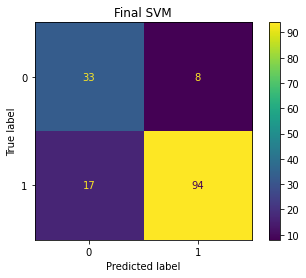

In [41]:
# print summary
print('SVM with mRMR Feature Selection and MinMax Scaler')
print(f'Accuracy: {accuracy_score(y_test, y_pred_mrmr_mm)}')
print(f'Classification: \n{classification_report(y_test, y_pred_mrmr_mm)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mrmr_mm)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# print summary
print('SVM with mRMR Feature Selection and Standard Scaler')
print(f'Accuracy: {accuracy_score(y_test, y_pred_mrmr_std)}')
print(f'Classification: \n{classification_report(y_test, y_pred_mrmr_std)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mrmr_std)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# print summary
print('SVM with Random Forest Selection and MinMax Scaler')
print(f'Accuracy: {accuracy_score(y_test, y_pred_sfm_mm)}')
print(f'Classification: \n{classification_report(y_test, y_pred_sfm_mm)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_sfm_mm)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# print summary
print('SVM with Random Forest Selection and Standard Scaler')
print(f'Accuracy: {accuracy_score(y_test, y_pred_sfm_std)}')
print(f'Classification: \n{classification_report(y_test, y_pred_sfm_std)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_sfm_std)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Final SVM')
plt.show()

**Comments:**

For SVM, Standard scaler with features selected by Random Forest is the best, with accuracy 83%, f1 0.73, 0.88 (class0, class1).

This will be compared with other more complicated models below.

#### 2. Random Forest

In [43]:
# initialize RandomForest Classifier
rfc = RandomForestClassifier(random_state=2000, n_jobs=-1)

# set up hyperparamters
rf_params = {'n_estimators': [500, 600], 
           'criterion': ['gini', 'entropy'],
           'max_depth': [10, 20, 30, 40]}

# fit GridSearch on Random Forest Classifier
gs_rfc = GridSearchCV(estimator=rfc, param_grid=rf_params, n_jobs=-1, verbose=1)
gs_rfc_mrmr = gs_rfc.fit(X_train_mrmr, y_train)

gs_rfc = GridSearchCV(estimator=rfc, param_grid=rf_params, n_jobs=-1, verbose=1)
gs_rfc_sfm = gs_rfc.fit(X_train_sfm, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [44]:
# check the best parameters and scores
print('Random Forest with mRMR')
print(f'Best params: {gs_rfc_mrmr.best_params_}')
print(f'Best score: {gs_rfc_mrmr.best_score_}\n')

print('Random Forest with Random Forest')
print(f'Best params: {gs_rfc_sfm.best_params_}')
print(f'Best score: {gs_rfc_sfm.best_score_}\n')

Random Forest with mRMR
Best params: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 600}
Best score: 0.8720053427235748

Random Forest with Random Forest
Best params: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 500}
Best score: 0.8974014935340902



In [45]:
# predict on test set
y_pred_gs_mrmr = gs_rfc_mrmr.predict(X_test_mrmr)
y_pred_gs_rfc = gs_rfc_sfm.predict(X_test_sfm)

Random Forest with mRMR
Accuracy: 0.8092105263157895
Classification: 
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        41
           1       0.88      0.86      0.87       111

    accuracy                           0.81       152
   macro avg       0.76      0.77      0.76       152
weighted avg       0.81      0.81      0.81       152



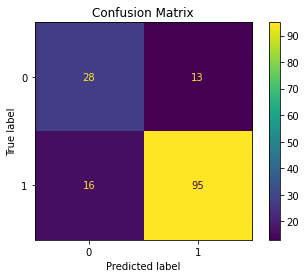

Random Forest with Random Forest
Accuracy: 0.8355263157894737
Classification: 
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.90      0.87      0.89       111

    accuracy                           0.84       152
   macro avg       0.79      0.80      0.80       152
weighted avg       0.84      0.84      0.84       152



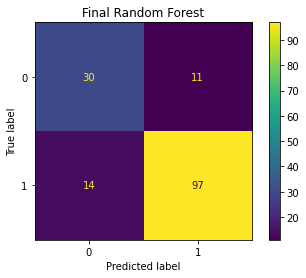

In [46]:
# print summary
print('Random Forest with mRMR')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gs_mrmr)}')
print(f'Classification: \n{classification_report(y_test, y_pred_gs_mrmr)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gs_mrmr)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# print summary
print('Random Forest with Random Forest')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gs_rfc)}')
print(f'Classification: \n{classification_report(y_test, y_pred_gs_rfc)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gs_rfc)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Final Random Forest')
plt.show()

#### 3. XGBoost

In [47]:
# initialize RandomForest Classifier
xgbrfc = xgb.XGBRFClassifier(n_jobs=-1, use_label_encoder=False)

# set up hyperparamters
xgbrf_params = {'n_estimators': [400, 500], 
                'max_depth': [5, 10, 15],
               'learning_rate': [0.025, 0.05, 0.1]}

# fit GridSearch on XGB Random Forest
gs_xgbrf = GridSearchCV(estimator=xgbrfc, param_grid=xgbrf_params, n_jobs=-1, verbose=1)
gs_xgbrf_mrmr = gs_xgbrf.fit(X_train_mrmr, y_train)

# fit GridSearch on XGB Random Forest
gs_xgbrf = GridSearchCV(estimator=xgbrfc, param_grid=xgbrf_params, n_jobs=-1, verbose=1)
gs_xgbrf_sfm = gs_xgbrf.fit(X_train_sfm, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[12:45:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[12:46:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
# check the best parameters and scores
print('XGB Random Forest with mRMR')
print(f'Best params: {gs_xgbrf_mrmr.best_params_}')
print(f'Best score: {gs_xgbrf_mrmr.best_score_}\n')

print('XGB Random Forest with Random Forest')
print(f'Best params: {gs_xgbrf_sfm.best_params_}')
print(f'Best score: {gs_xgbrf_sfm.best_score_}\n')

XGB Random Forest with mRMR
Best params: {'learning_rate': 0.025, 'max_depth': 15, 'n_estimators': 400}
Best score: 0.8521522676218808

XGB Random Forest with Random Forest
Best params: {'learning_rate': 0.025, 'max_depth': 10, 'n_estimators': 400}
Best score: 0.879740149353409



In [49]:
# predict on test set
y_pred_gs_xgb_mrmr = gs_rfc_mrmr.predict(X_test_mrmr)
y_pred_gs_xgb_rfc = gs_rfc_sfm.predict(X_test_sfm)

XGB Random Forest with mRMR
Accuracy: 0.8092105263157895
Classification: 
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        41
           1       0.88      0.86      0.87       111

    accuracy                           0.81       152
   macro avg       0.76      0.77      0.76       152
weighted avg       0.81      0.81      0.81       152



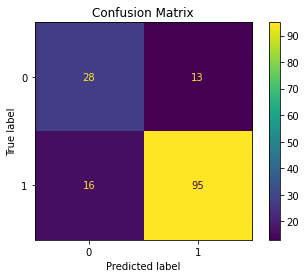

XGB Random Forest with Random Forest
Accuracy: 0.8355263157894737
Classification: 
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.90      0.87      0.89       111

    accuracy                           0.84       152
   macro avg       0.79      0.80      0.80       152
weighted avg       0.84      0.84      0.84       152



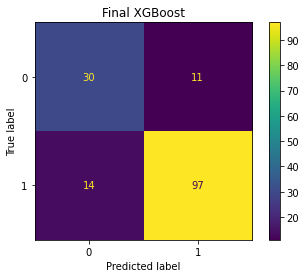

In [50]:
# print summary
print('XGB Random Forest with mRMR')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gs_xgb_mrmr)}')
print(f'Classification: \n{classification_report(y_test, y_pred_gs_xgb_mrmr)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gs_xgb_mrmr)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# print summary
print('XGB Random Forest with Random Forest')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gs_xgb_rfc)}')
print(f'Classification: \n{classification_report(y_test, y_pred_gs_xgb_rfc)}')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gs_xgb_rfc)

# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Final XGBoost')
plt.show()